In [62]:
%matplotlib inline

In [63]:
import matplotlib.pyplot as plt
import datetime as dt

In [64]:
capacity = {"eliot": 24, "ivaloo": 42, "morgan": 20, "lower park": 12, "upper park": 32}
total_capacity = sum(capacity.values())
upper_park_nw = 15
lower_park_se = 12
lower_park_nw = 9 # just an estimate
lower_park_diff = lower_park_se - lower_park_nw
print(total_capacity)

130


In [73]:
street_data = {"eliot": [18, 16, 21, 12, 14, 18], "ivaloo": [26, 24, 20, 26, 28, 13], "morgan": [15, 9, 11, 16, 12, 10],
                "lower park":[5, 3, 5, 7, 8, 5], "upper park": [16, 14, 17, 15, 15, 18]}

dates = ['Wed Jan 27 10:00:00 2016', 'Wed Jan 27 16:00:00 2016', 'Wed Jan 27 21:00:00 2016', 'Thu Jan 28 10:00:00 2016', 'Thu Jan 28 16:00:00 2016', 'Thu Jan 28 21:00:00 2016']
d = [dt.datetime.strptime(x, '%a %b %d %H:%M:%S %Y') for x in dates]

neighborhood_totals_by_date = [sum(x) for x in zip(*street_data.values())]

pct_full_current = [round(x/total_capacity, 2) for x in neighborhood_totals_by_date]
pct_full_option_one = [round(x/(total_capacity-capacity["upper park"]-lower_park_se), 2) for x in neighborhood_totals_by_date]
pct_full_option_two = [round(x/(total_capacity-upper_park_nw-lower_park_diff), 2) for x in neighborhood_totals_by_date]
pct_full_option_twoA = [round(x/(total_capacity-upper_park_nw), 2) for x in neighborhood_totals_by_date]
print("Current parking: {0} average: {1}".format(pct_full_current, round(sum(pct_full_current)/6,2)))
print("Option 1: {0}, average: {1}".format(pct_full_option_one, round(sum(pct_full_option_one)/6,2)))
print("Option 2: {0}, average: {1}".format(pct_full_option_two, round(sum(pct_full_option_two)/6,2)))
print("Option 2A: {0}, average: {1}".format(pct_full_option_twoA, round(sum(pct_full_option_twoA)/6,2)))
print(dates)

Current parking: [0.62, 0.51, 0.57, 0.58, 0.59, 0.49] average: 0.56
Option 1: [0.93, 0.77, 0.86, 0.88, 0.9, 0.74], average: 0.85
Option 2: [0.71, 0.59, 0.66, 0.68, 0.69, 0.57], average: 0.65
Option 2A: [0.7, 0.57, 0.64, 0.66, 0.67, 0.56], average: 0.63
['Wed Jan 27 10:00:00 2016', 'Wed Jan 27 16:00:00 2016', 'Wed Jan 27 21:00:00 2016', 'Thu Jan 28 10:00:00 2016', 'Thu Jan 28 16:00:00 2016', 'Thu Jan 28 21:00:00 2016']


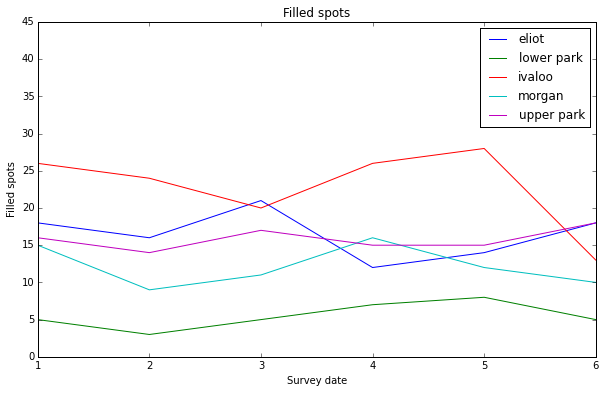

In [66]:
colors={'eliot': 'red', 'ivaloo': 'green', 'morgan': 'blue', 'lower park': 'orange', 'upper park': 'purple'}
x = [1,2,3,4,5,6]

plt.figure(1, figsize=(10, 6))
plt.xlabel('Survey date')
plt.ylabel('Filled spots')
plt.title('Filled spots')

for name, count in street_data.items():
    plt.plot(x, count, label=name)
plt.axis([1, 6, 0, 45])
plt.legend()
plt.show()

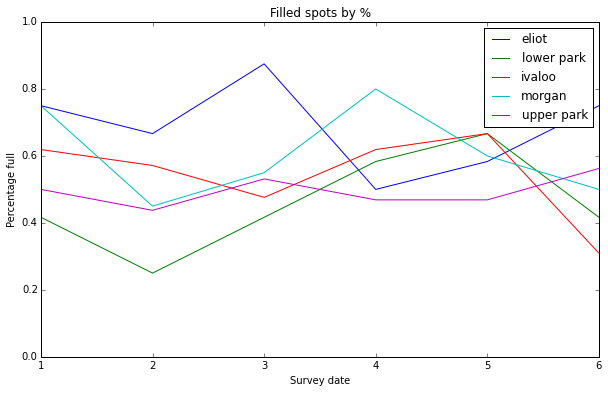

In [67]:
plt.figure(2, figsize=(10, 6))
plt.xlabel('Survey date')
plt.ylabel('Percentage full')
plt.title('Filled spots by %')

for name, count in street_data.items():
    plt.plot(x, [x/capacity[name] for x in count], label=name)
plt.axis([1, 6, 0, 1])
plt.legend()
plt.show()

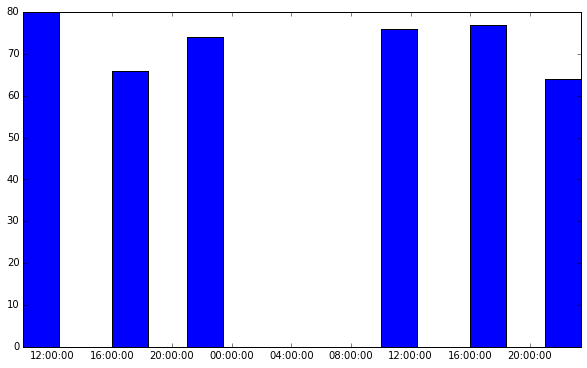

In [68]:
plt.figure(3, figsize=(10,6))
ax = plt.subplot(111)

ax.bar(d, neighborhood_totals_by_date, width=0.1)
ax.xaxis_date()

plt.show()

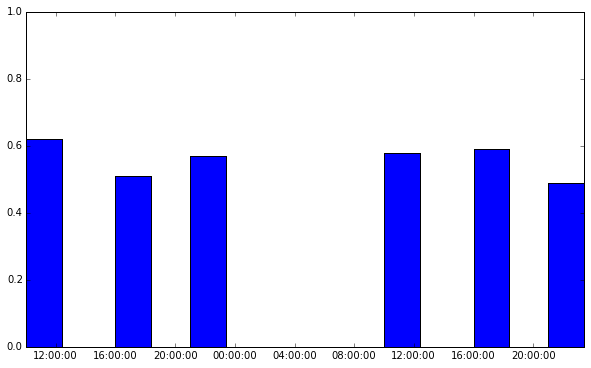

In [70]:
plt.figure(4, figsize=(10,6))
ax = plt.subplot(111)

ax.bar(d, pct_full_current, width=0.1)
ax.xaxis_date()
plt.ylim([0,1])

plt.show()